## Parte 2 . Deep Networks

In [78]:
#Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

from keras import backend as K
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#
#Carga de los datos utilizados
#
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
#
#Escalado de los datos
#
scaler =  StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
y_train_scaled = df_train.pop('MEDV')

scaler =  StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
y_test_scaled = df_test.pop('MEDV')

y_train_scaled = y_train_scaled.values.reshape(-1,1)
y_test_scaled = y_test_scaled.values.reshape(-1,1)


In [79]:
# Revision de los datos
X_train_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,7.194480e-16,-7.733480e-16,1.921653e-16,-2.085696e-16,1.335783e-16,1.476392e-16,-5.893849e-16,-2.999653e-16,2.460653e-16,-3.491783e-16,1.839631e-16,5.975871e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.985312e-01,-1.514998e+00,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.658465e+00,-4.025619e+00,-1.503671e+00,-1.906479e+00,-3.762978e+00,-2.657470e-01
25%,-4.046811e-01,-4.985312e-01,-8.618530e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.879389e-01,1.944575e-01,-8.127456e-01,-6.397304e-01,2.657470e-01,-2.657470e-01
50%,-3.818337e-01,-4.985312e-01,-3.598727e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,3.802716e-01,3.719387e-01,-1.843784e-01,-1.308656e-01,2.657470e-01,-2.657470e-01
75%,-1.827370e-03,3.430872e-01,1.000608e+00,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,8.143769e-01,4.171933e-01,6.233235e-01,2.859704e-01,2.657470e-01,-2.657470e-01
max,1.037470e+01,3.709561e+00,2.375350e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.682587e+00,4.277489e-01,3.396758e+00,2.965631e+00,2.657470e-01,3.762978e+00


Los datos estan escalados de forma que tiene $\mu=0$ y $\sigma=1$

In [3]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

**B)**

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 96.8810 - acc: 0.0106 - val_loss: 42.7365 - val_acc: 0.0079
Epoch 2/300
379/379 [==============================] - 0s 102us/step - loss: 30.0437 - acc: 0.0132 - val_loss: 32.5823 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 107us/step - loss: 21.9777 - acc: 0.0185 - val_loss: 27.0514 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 106us/step - loss: 17.1628 - acc: 0.0132 - val_loss: 22.9306 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 120us/step - loss: 14.2218 - acc: 0.0237 - val_loss: 22.4738 - val_acc: 0.0079
Epoch 6/300
379/379 [==============================] - 0s 108us/step - loss: 12.7808 - acc: 0.0185 - val_loss: 17.5584 - val_acc: 0.0000e+00
Epoch 7/300
379/379 [==============================] - 0s 99us/step - loss: 11.5999 - acc: 0.0211 - val_loss: 15.4735 

Epoch 61/300
379/379 [==============================] - 0s 93us/step - loss: 0.2969 - acc: 0.0712 - val_loss: 0.4212 - val_acc: 0.0709
Epoch 62/300
379/379 [==============================] - 0s 95us/step - loss: 0.2893 - acc: 0.0712 - val_loss: 0.3073 - val_acc: 0.0945
Epoch 63/300
379/379 [==============================] - 0s 98us/step - loss: 0.2840 - acc: 0.0792 - val_loss: 0.3868 - val_acc: 0.0709
Epoch 64/300
379/379 [==============================] - 0s 83us/step - loss: 0.2909 - acc: 0.0792 - val_loss: 0.3447 - val_acc: 0.0709
Epoch 65/300
379/379 [==============================] - 0s 85us/step - loss: 0.2763 - acc: 0.0660 - val_loss: 0.4145 - val_acc: 0.0709
Epoch 66/300
379/379 [==============================] - 0s 98us/step - loss: 0.2773 - acc: 0.0686 - val_loss: 0.3101 - val_acc: 0.0866
Epoch 67/300
379/379 [==============================] - 0s 112us/step - loss: 0.2842 - acc: 0.0739 - val_loss: 0.3500 - val_acc: 0.0709
Epoch 68/300
379/379 [==============================] 

379/379 [==============================] - 0s 90us/step - loss: 0.1373 - acc: 0.0844 - val_loss: 0.1873 - val_acc: 0.1260
Epoch 182/300
379/379 [==============================] - 0s 99us/step - loss: 0.1297 - acc: 0.0923 - val_loss: 0.2396 - val_acc: 0.1102
Epoch 183/300
379/379 [==============================] - 0s 83us/step - loss: 0.1371 - acc: 0.0923 - val_loss: 0.2823 - val_acc: 0.1024
Epoch 184/300
379/379 [==============================] - 0s 93us/step - loss: 0.1261 - acc: 0.0950 - val_loss: 0.1916 - val_acc: 0.1260
Epoch 185/300
379/379 [==============================] - 0s 90us/step - loss: 0.1265 - acc: 0.0923 - val_loss: 0.1622 - val_acc: 0.1181
Epoch 186/300
379/379 [==============================] - 0s 82us/step - loss: 0.1298 - acc: 0.0976 - val_loss: 0.2638 - val_acc: 0.1024
Epoch 187/300
379/379 [==============================] - 0s 85us/step - loss: 0.1277 - acc: 0.0950 - val_loss: 0.1853 - val_acc: 0.1260
Epoch 188/300
379/379 [==============================] - 0s 95

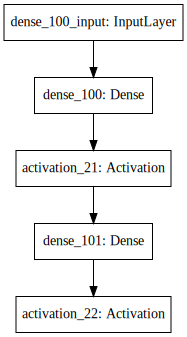

In [194]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer="uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(1,kernel_initializer = 'uniform'))
model.add(Activation('linear'))

sgd = SGD(lr = 0.01)
model.compile(optimizer = sgd, loss='mean_squared_error',metrics=['accuracy'])

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [195]:
#obtencion de pesos del modelo entrenado despues de 300 epochs
loss1 = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights

gradients = K.gradients(loss1, listOfVariableTensors)
sess1 = K.get_session()
evaluated_gradients = sess1.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
pd.DataFrame(evaluated_gradients[0]).head()
#obtener pesos antes del entrenamiento
#loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
#listOfVariableTensors_before = model_before.trainable_weights

#gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
#sess_before = K.get_session()
#evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
#evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.296605,0.174267,0.227054,-0.001884,-0.693658,0.076322,0.021562,0.103653,0.329035,0.004654,...,0.321648,-0.009494,-0.004056,0.181642,0.090313,0.334765,0.117097,0.214881,-0.011748,0.192553
1,-0.359942,-0.169181,-0.104808,-0.003962,0.599047,-0.050763,-0.030625,-0.247439,-0.271362,-0.055939,...,-0.413758,-0.085240,0.005518,-0.221638,-0.179827,-0.311706,-0.256099,-0.169493,-0.030565,-0.078602
2,0.480034,0.411325,0.416153,0.042908,-0.982081,0.295660,0.116191,0.420641,0.546317,0.309427,...,0.499901,0.279251,-0.017318,0.484811,0.376514,0.522305,0.513998,0.476645,0.195353,0.342994
3,0.389316,0.386669,0.331110,0.033959,-0.697852,0.247981,0.093930,0.409144,0.422275,0.265325,...,0.437571,0.276762,-0.014594,0.370079,0.409932,0.415400,0.412818,0.370223,0.168700,0.281204
4,-0.686308,-0.254892,-0.103926,-0.005251,1.379314,-0.066632,-0.053139,-0.493035,-0.380999,-0.088275,...,-0.652088,-0.088748,0.006870,-0.378679,-0.453496,-0.613765,-0.398474,-0.183595,-0.022661,-0.045488


In [196]:
def plot_data(loss,val_loss,acc,val_acc):
    plt.close('all')

    f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    axarr[0].set_title('MSE vs Epoch')
    axarr[0].plot(loss)
    axarr[0].plot(val_loss)
    axarr[0].set_xlabel('epoch')
    axarr[0].set_ylabel('mse')
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[1].set_title('Acc vs Epoch')
    axarr[1].plot(acc)
    axarr[1].plot(val_acc)
    axarr[1].set_xlabel('epoch')
    axarr[1].set_ylabel('acc')
    #plt.ylim(ymin=0, ymax=1)

    axarr[1].legend(['entrenamiento', 'prueba'], loc='upper right')
    axarr[0].legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

In [197]:
def tensor_of_gradients(model_before,model_after):
    #obtencion de pesos del modelo entrenado despues de 300 epochs
    loss = keras.losses.mean_squared_error(model_after.output,y_train_scaled)
    listOfVariableTensors = model_after.trainable_weights

    gradients = K.gradients(loss, listOfVariableTensors)
    sess1 = K.get_session()
    evaluated_gradients = sess1.run(gradients,feed_dict={model_after.input:X_train_scaled.as_matrix()})
    evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
    
    #obtener pesos antes del entrenamiento
    loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
    listOfVariableTensors_before = model_before.trainable_weights
    
    gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
    sess_before = K.get_session()
    evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
    evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]
    return evaluated_gradients_before, evaluated_gradients

In [198]:
def plot_weight_before_and_after(evaluated_gradients_before,evaluated_gradients_after):
    plt.close('all')
    f, axarr = plt.subplots(2, sharey=True,figsize=(8,8))
    
    axarr[0].set_title('Distribución de gradientes de pesos antes de entrenar')
    axarr[1].set_title('Distribución de gradientes de pesos después de entrenar')
    
    axarr[0].hist(evaluated_gradients_before)
    axarr[1].hist(evaluated_gradients_after)
    
    plt.ylabel('Frecuencia')
    plt.xlabel('Valor')
    
    plt.show()
    

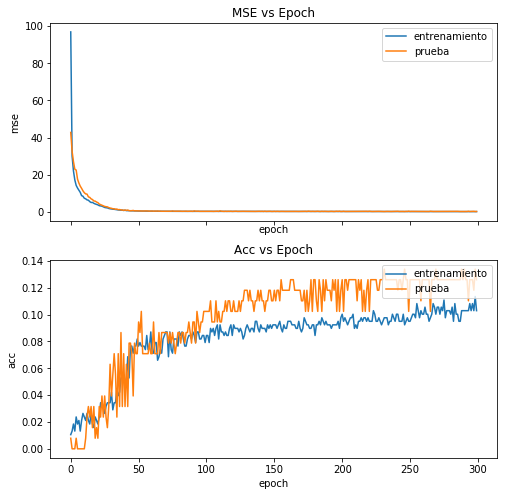

In [199]:
plot_data(history.history['loss'],history.history['val_loss'],history.history['acc'],history.history['val_acc'])

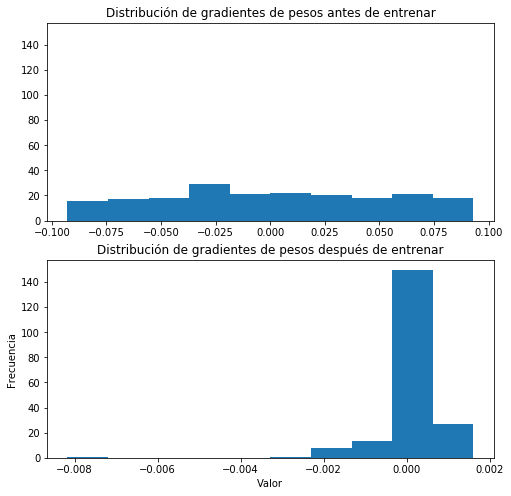

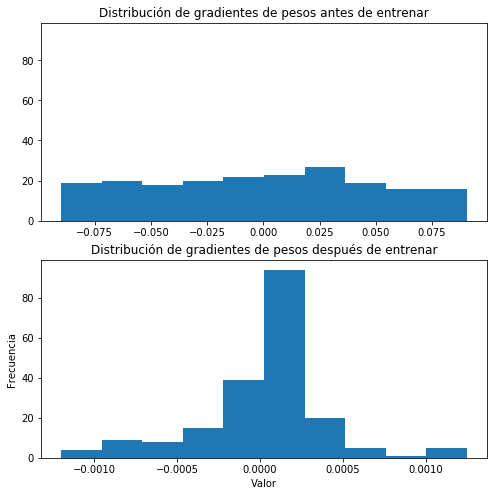

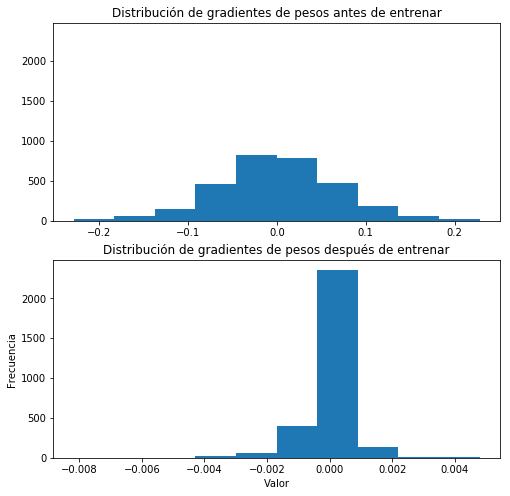

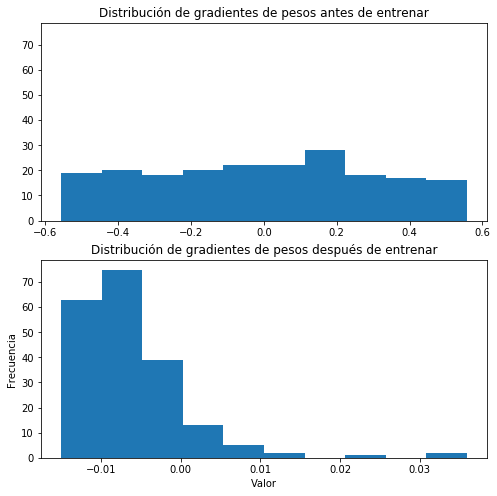

In [114]:
#plt.hist(evaluated_gradients1[1])
#plt.hist(evaluated_gradients2[1])
#plt.title("Histograma despues de entrenar 300 epochs")
#plt.xlabel("Value")
#plt.ylabel("Frequency")
#plt.legend(['Despues', 'Antes'], loc='upper left')
#evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#print(len(evaluated_gradients_before[0][0]))
#pesos conectados a la primera neurona
plot_weight_before_and_after(evaluated_gradients_before[0][0], evaluated_gradients[0][0])
plot_weight_before_and_after(evaluated_gradients_before[0][1], evaluated_gradients[0][1])
### Pesos de cada capa
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])



Se lográ apreciar claramente la distribución uniforme, $-1/\sqrt{N}$ y $1/\sqrt{N}$,( https://github.com/keras-team/keras/blob/master/keras/initializers.py#L49 ) y se ve la reorganización de los pesos luego de 300 epochs. La distribución de campana que se observa en la primera capa es debido a que esta es la suma de todas las neuronas de la capa de entrada, cual a su vez cada una es uniforme.

**C)**

In [116]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [127]:
#Modelo profundo a usar
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))

model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 139.4797 - val_loss: 100.4684
Epoch 2/300
379/379 [==============================] - 0s 104us/step - loss: 89.1650 - val_loss: 82.2973
Epoch 3/300
379/379 [==============================] - 0s 107us/step - loss: 86.8549 - val_loss: 104.9036
Epoch 4/300
379/379 [==============================] - 0s 112us/step - loss: 98.6087 - val_loss: 84.7716
Epoch 5/300
379/379 [==============================] - 0s 124us/step - loss: 94.8191 - val_loss: 108.5846
Epoch 6/300
379/379 [==============================] - 0s 114us/step - loss: 89.9809 - val_loss: 87.4329
Epoch 7/300
379/379 [==============================] - 0s 102us/step - loss: 89.9972 - val_loss: 90.1589
Epoch 8/300
379/379 [==============================] - 0s 98us/step - loss: 87.9054 - val_loss: 83.4983
Epoch 9/300
379/379 [==============================] - 0s 111us/step - loss: 89.3004 - val_loss: 82.5611
Epoch 10

379/379 [==============================] - 0s 105us/step - loss: 0.5318 - val_loss: 0.5726
Epoch 157/300
379/379 [==============================] - 0s 93us/step - loss: 0.7454 - val_loss: 0.5120
Epoch 158/300
379/379 [==============================] - 0s 101us/step - loss: 0.5207 - val_loss: 0.7500
Epoch 159/300
379/379 [==============================] - 0s 95us/step - loss: 0.5162 - val_loss: 0.6842
Epoch 160/300
379/379 [==============================] - 0s 90us/step - loss: 0.7921 - val_loss: 0.4881
Epoch 161/300
379/379 [==============================] - 0s 95us/step - loss: 0.4699 - val_loss: 0.4643
Epoch 162/300
379/379 [==============================] - 0s 101us/step - loss: 1.4787 - val_loss: 0.9807
Epoch 163/300
379/379 [==============================] - 0s 97us/step - loss: 2.2581 - val_loss: 2.3520
Epoch 164/300
379/379 [==============================] - 0s 95us/step - loss: 3.1517 - val_loss: 1.0796
Epoch 165/300
379/379 [==============================] - 0s 97us/step - los

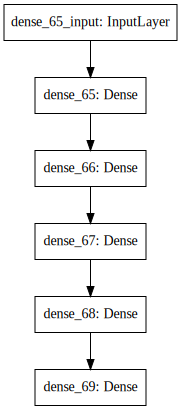

In [128]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

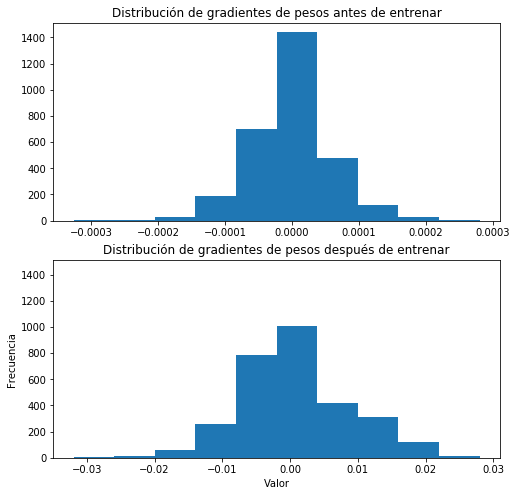

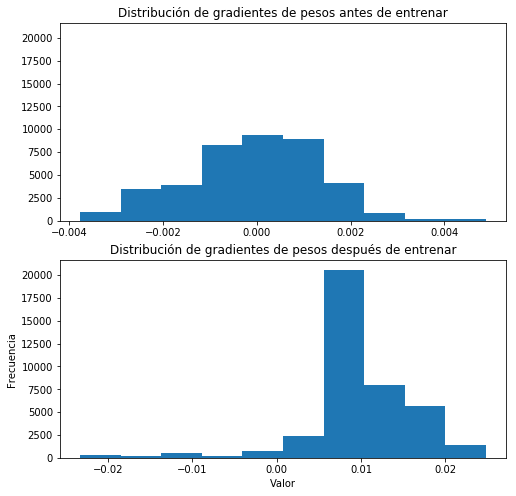

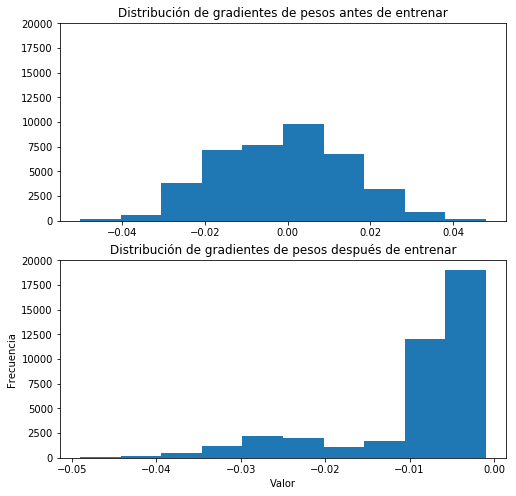

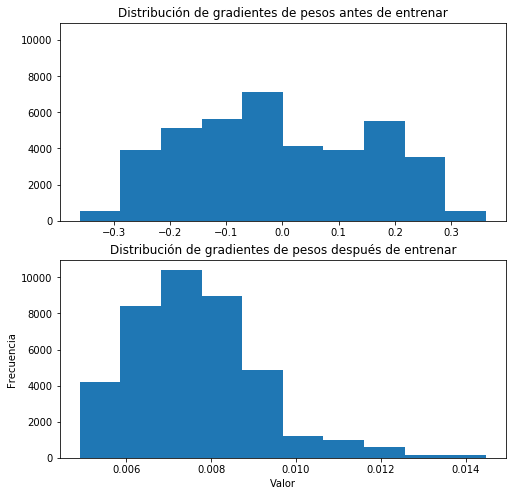

In [164]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)

plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())

In [165]:
#pd.DataFrame(evaluated_gradients[2]).describe()

Se espera que para redes profunda la función de activación sigmoidal se obtenga un efecto de desvanicimiento del gradiente. Como heuristica intuitiva pensar que la red aprende más rapido cuando la magnitud es mayor. Haciendo referencia a que esa conexión tiene un peso más grande debido al impacto que genera al resultado final. (**Entonces de esto si la red en las primeras capas no presenta una suma de pesos donde se note una preferencia se dira que se presencia un desvanecimiento, y si existe un valor muy grande se esta en presencia de una explosion del gradiente ** discutir?)

**D)**

In [166]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 152.4258 - val_loss: 97.8702
Epoch 2/300
379/379 [==============================] - 0s 114us/step - loss: 94.3390 - val_loss: 81.5816
Epoch 3/300
379/379 [==============================] - 0s 120us/step - loss: 91.9643 - val_loss: 81.4786
Epoch 4/300
379/379 [==============================] - 0s 127us/step - loss: 93.2136 - val_loss: 82.3285
Epoch 5/300
379/379 [==============================] - 0s 122us/step - loss: 86.6414 - val_loss: 83.0629
Epoch 6/300
379/379 [==============================] - 0s 108us/step - loss: 87.3758 - val_loss: 100.1376
Epoch 7/300
379/379 [==============================] - 0s 108us/step - loss: 90.2068 - val_loss: 88.3369
Epoch 8/300
379/379 [==============================] - 0s 114us/step - loss: 85.2529 - val_loss: 80.5592
Epoch 9/300
379/379 [==============================] - 0s 110us/step - loss: 87.6196 - val_loss: 106.3229
Epoch 10

379/379 [==============================] - 0s 98us/step - loss: 0.8444 - val_loss: 0.4274
Epoch 80/300
379/379 [==============================] - 0s 114us/step - loss: 0.7299 - val_loss: 0.2915
Epoch 81/300
379/379 [==============================] - 0s 101us/step - loss: 0.3133 - val_loss: 0.3181
Epoch 82/300
379/379 [==============================] - 0s 102us/step - loss: 0.2861 - val_loss: 0.7032
Epoch 83/300
379/379 [==============================] - 0s 106us/step - loss: 0.6052 - val_loss: 1.7979
Epoch 84/300
379/379 [==============================] - 0s 105us/step - loss: 0.8972 - val_loss: 0.6031
Epoch 85/300
379/379 [==============================] - 0s 97us/step - loss: 0.3866 - val_loss: 0.8418
Epoch 86/300
379/379 [==============================] - 0s 100us/step - loss: 0.5847 - val_loss: 2.0233
Epoch 87/300
379/379 [==============================] - 0s 111us/step - loss: 1.7280 - val_loss: 1.5378
Epoch 88/300
379/379 [==============================] - 0s 91us/step - loss: 0.

379/379 [==============================] - 0s 97us/step - loss: 0.1520 - val_loss: 0.0603
Epoch 236/300
379/379 [==============================] - 0s 103us/step - loss: 0.0950 - val_loss: 0.1059
Epoch 237/300
379/379 [==============================] - 0s 110us/step - loss: 0.1364 - val_loss: 0.0731
Epoch 238/300
379/379 [==============================] - 0s 112us/step - loss: 0.3055 - val_loss: 0.0787
Epoch 239/300
379/379 [==============================] - 0s 107us/step - loss: 0.2067 - val_loss: 0.0998
Epoch 240/300
379/379 [==============================] - 0s 112us/step - loss: 0.0860 - val_loss: 0.0641
Epoch 241/300
379/379 [==============================] - 0s 109us/step - loss: 0.0800 - val_loss: 0.0903
Epoch 242/300
379/379 [==============================] - 0s 110us/step - loss: 0.2718 - val_loss: 0.1996
Epoch 243/300
379/379 [==============================] - 0s 95us/step - loss: 0.1530 - val_loss: 0.0593
Epoch 244/300
379/379 [==============================] - 0s 104us/step 

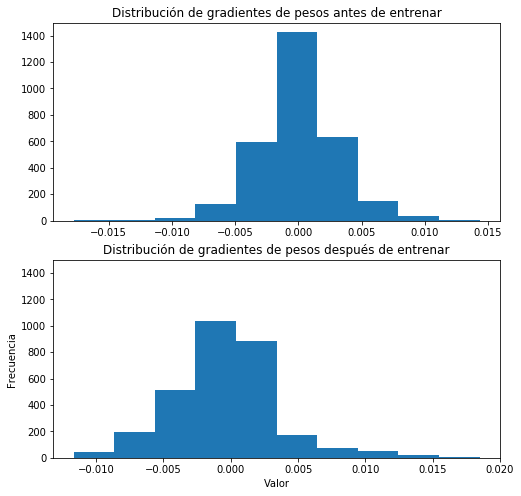

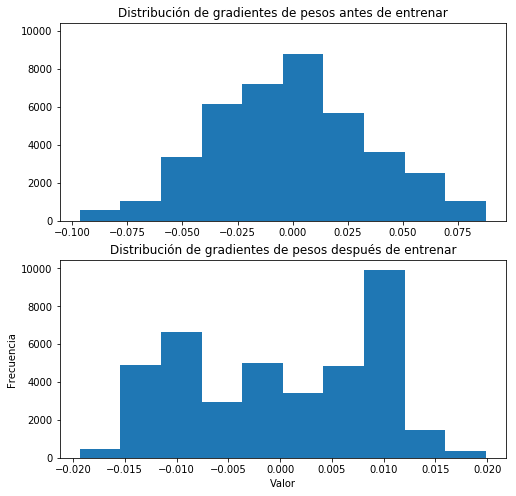

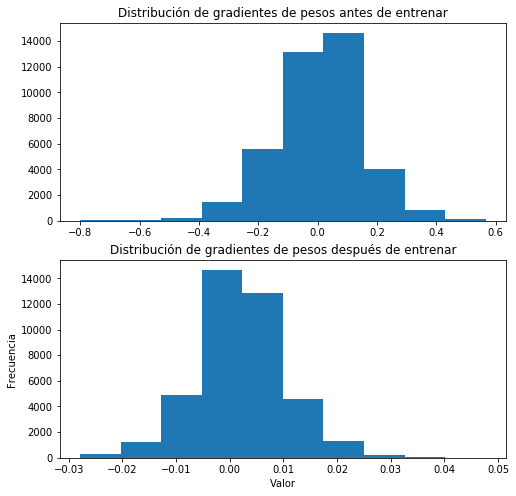

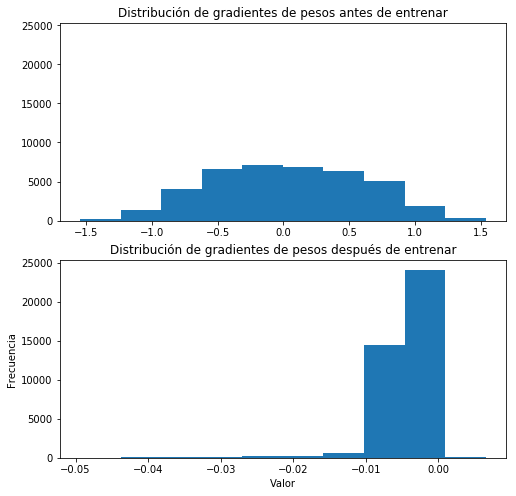

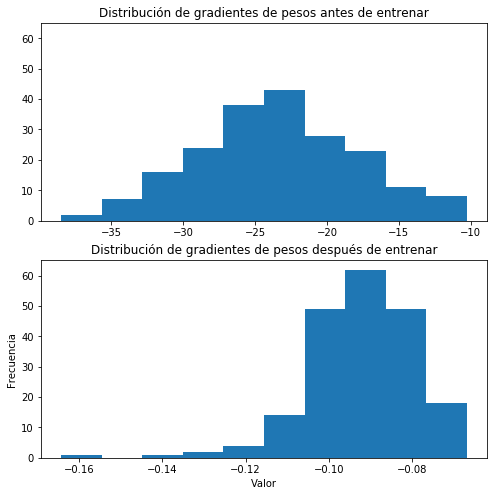

In [175]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

**E)**

In [178]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 429.9145 - val_loss: 237.3361
Epoch 2/300
379/379 [==============================] - 0s 110us/step - loss: 106.5100 - val_loss: 63.0230
Epoch 3/300
379/379 [==============================] - 0s 117us/step - loss: 106.3959 - val_loss: 71.5327
Epoch 4/300
379/379 [==============================] - 0s 116us/step - loss: 64.0583 - val_loss: 49.0814
Epoch 5/300
379/379 [==============================] - 0s 123us/step - loss: 68.6902 - val_loss: 50.6128
Epoch 6/300
379/379 [==============================] - 0s 108us/step - loss: 62.7625 - val_loss: 79.6629
Epoch 7/300
379/379 [==============================] - 0s 101us/step - loss: 54.0321 - val_loss: 78.8512
Epoch 8/300
379/379 [==============================] - 0s 100us/step - loss: 65.8538 - val_loss: 40.6830
Epoch 9/300
379/379 [==============================] - 0s 115us/step - loss: 40.4953 - val_loss: 8.9201
Epoch 10

Epoch 79/300
379/379 [==============================] - 0s 108us/step - loss: 0.2457 - val_loss: 2.6055
Epoch 80/300
379/379 [==============================] - ETA: 0s - loss: 1.554 - 0s 93us/step - loss: 1.1812 - val_loss: 1.6655
Epoch 81/300
379/379 [==============================] - 0s 97us/step - loss: 0.4439 - val_loss: 0.7657
Epoch 82/300
379/379 [==============================] - 0s 103us/step - loss: 0.1746 - val_loss: 1.2534
Epoch 83/300
379/379 [==============================] - 0s 105us/step - loss: 0.5567 - val_loss: 0.7947
Epoch 84/300
379/379 [==============================] - 0s 106us/step - loss: 0.2475 - val_loss: 1.2670
Epoch 85/300
379/379 [==============================] - 0s 108us/step - loss: 0.1556 - val_loss: 1.0605
Epoch 86/300
379/379 [==============================] - 0s 110us/step - loss: 0.3194 - val_loss: 1.4169
Epoch 87/300
379/379 [==============================] - 0s 91us/step - loss: 0.6461 - val_loss: 0.6064
Epoch 88/300
379/379 [=====================

379/379 [==============================] - 0s 95us/step - loss: 0.0476 - val_loss: 0.3912
Epoch 236/300
379/379 [==============================] - 0s 99us/step - loss: 0.0165 - val_loss: 0.3855
Epoch 237/300
379/379 [==============================] - 0s 103us/step - loss: 0.0249 - val_loss: 0.6013
Epoch 238/300
379/379 [==============================] - 0s 97us/step - loss: 0.0930 - val_loss: 0.6085
Epoch 239/300
379/379 [==============================] - 0s 90us/step - loss: 0.0253 - val_loss: 0.4022
Epoch 240/300
379/379 [==============================] - 0s 108us/step - loss: 0.0140 - val_loss: 0.4831
Epoch 241/300
379/379 [==============================] - 0s 108us/step - loss: 0.0171 - val_loss: 0.4093
Epoch 242/300
379/379 [==============================] - 0s 111us/step - loss: 0.0218 - val_loss: 0.5617
Epoch 243/300
379/379 [==============================] - 0s 95us/step - loss: 0.0857 - val_loss: 1.0365
Epoch 244/300
379/379 [==============================] - 0s 122us/step - l

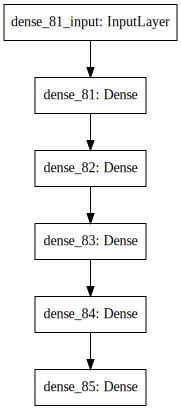

In [179]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

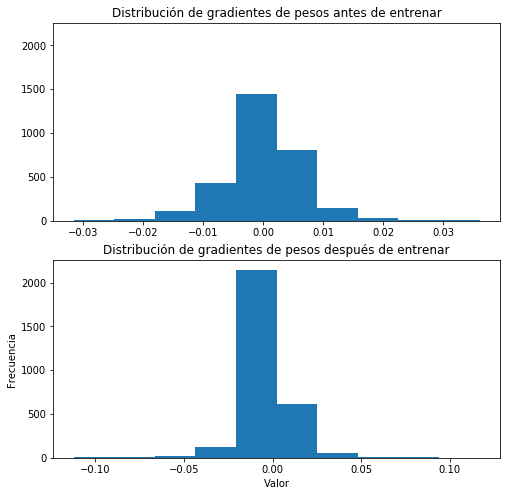

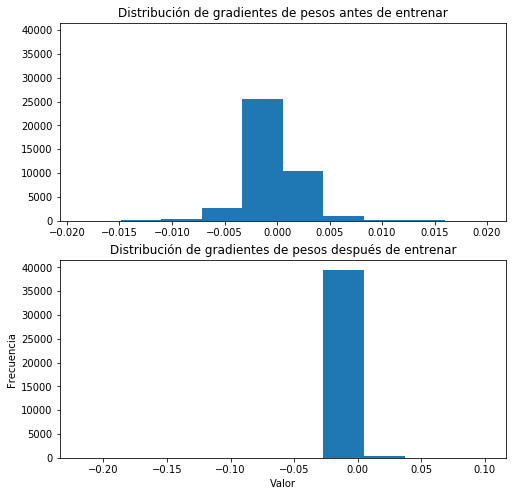

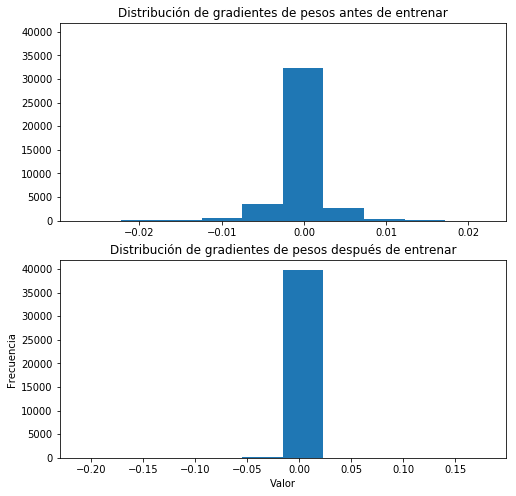

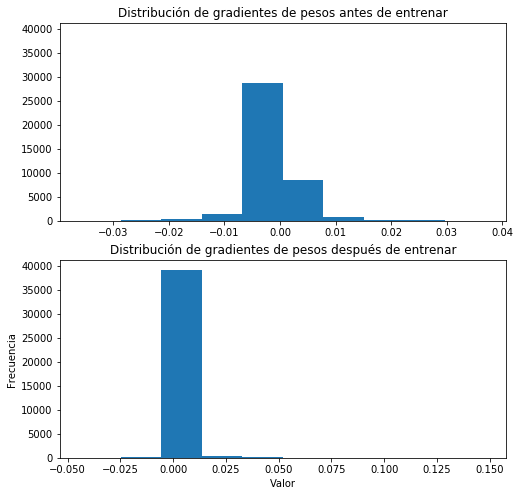

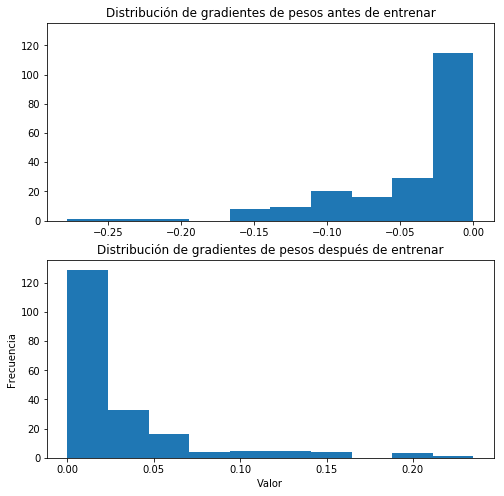

In [180]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

In [184]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s 112us/step - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s 114us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 117us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 110us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 112us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 108us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 108us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 119us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 123us/step - loss: nan -

379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 85/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 98us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 111us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 103us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [==============================] - 0s 111us/step - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s 104us/step - loss: nan - val_loss: nan
Epoch 94/300
379/379 [============

379/379 [==============================] - 0s 93us/step - loss: nan - val_loss: nan
Epoch 251/300
379/379 [==============================] - 0s 103us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 104us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 93us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 91us/step - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 260/300
379/379 [=======

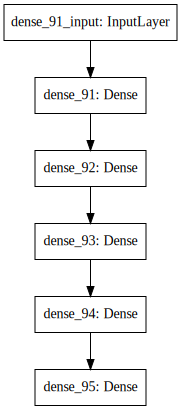

In [185]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

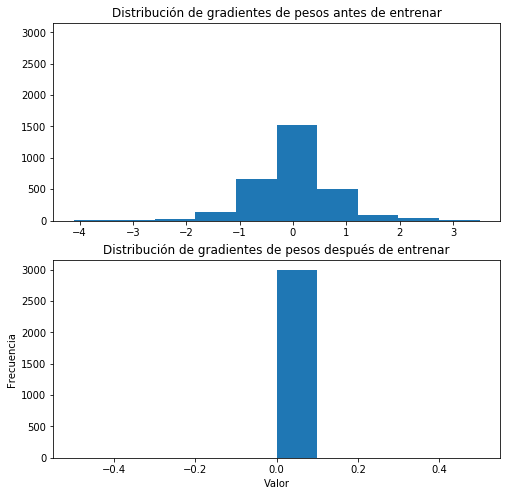

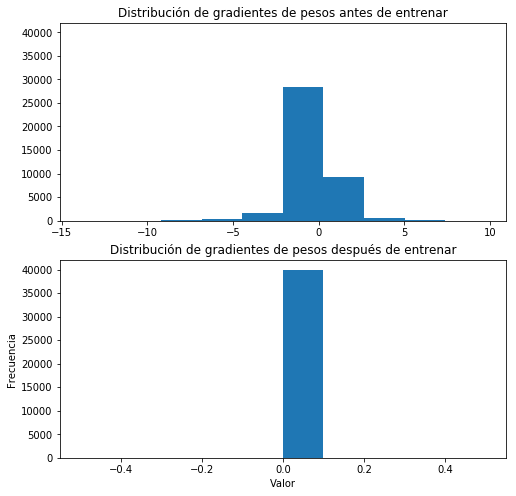

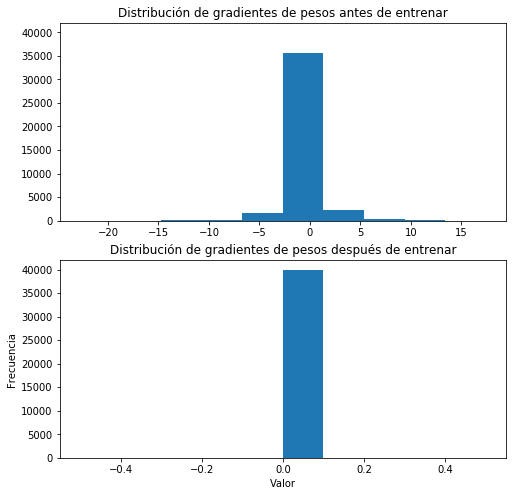

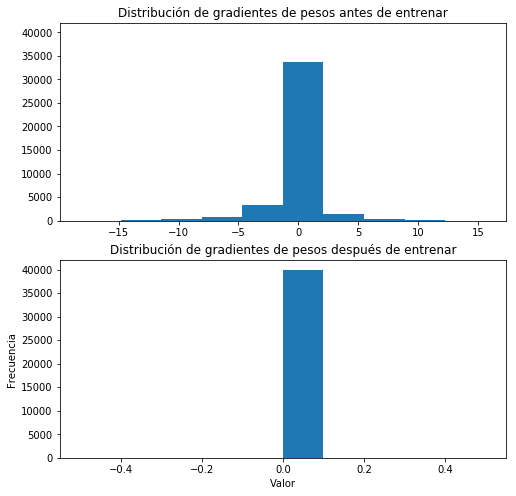

c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6193: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, xi.min())
c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6194: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, xi.max())


ValueError: max must be larger than min in range parameter.

In [186]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

https://en.wikipedia.org/wiki/Vanishing_gradient_problem

Con la configuración de he_uniform como inicializador, y relu como activador de las capas ocultas, el modelo divergio.

**F)**¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

In [215]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
#con momentum se logro estabilizar el modelo de forma similar al modelo b.
sgd = SGD(lr=0.01,momentum=0.8)
model.compile(optimizer=sgd,loss='mean_squared_error',metrics=['accuracy'])

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 160.0919 - acc: 0.0026 - val_loss: 83.8490 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 122us/step - loss: 95.9244 - acc: 0.0053 - val_loss: 76.8150 - val_acc: 0.0079
Epoch 3/300
379/379 [==============================] - 0s 134us/step - loss: 82.2797 - acc: 0.0079 - val_loss: 46.7487 - val_acc: 0.0315
Epoch 4/300
379/379 [==============================] - 0s 115us/step - loss: 33.7911 - acc: 0.0053 - val_loss: 29.1636 - val_acc: 0.0079
Epoch 5/300
379/379 [==============================] - 0s 142us/step - loss: 15.1549 - acc: 0.0079 - val_loss: 12.3052 - val_acc: 0.0315
Epoch 6/300
379/379 [==============================] - 0s 140us/step - loss: 8.2787 - acc: 0.0237 - val_loss: 6.8640 - val_acc: 0.0394
Epoch 7/300
379/379 [==============================] - 0s 128us/step - loss: 4.9029 - acc: 0.0237 - val_loss: 3.6896 - val_acc: 0.0

Epoch 61/300
379/379 [==============================] - 0s 124us/step - loss: 0.0401 - acc: 0.1266 - val_loss: 0.2109 - val_acc: 0.1260
Epoch 62/300
379/379 [==============================] - 0s 110us/step - loss: 0.0440 - acc: 0.1266 - val_loss: 0.1287 - val_acc: 0.1260
Epoch 63/300
379/379 [==============================] - 0s 102us/step - loss: 0.0496 - acc: 0.1214 - val_loss: 0.4158 - val_acc: 0.0551
Epoch 64/300
379/379 [==============================] - 0s 114us/step - loss: 0.0668 - acc: 0.1240 - val_loss: 0.0731 - val_acc: 0.1417
Epoch 65/300
379/379 [==============================] - 0s 110us/step - loss: 0.0839 - acc: 0.1187 - val_loss: 0.2029 - val_acc: 0.1181
Epoch 66/300
379/379 [==============================] - 0s 118us/step - loss: 0.0485 - acc: 0.1346 - val_loss: 0.1828 - val_acc: 0.1339
Epoch 67/300
379/379 [==============================] - 0s 103us/step - loss: 0.0441 - acc: 0.1293 - val_loss: 0.0740 - val_acc: 0.1260
Epoch 68/300
379/379 [==========================

379/379 [==============================] - 0s 106us/step - loss: 0.0825 - acc: 0.1240 - val_loss: 0.1030 - val_acc: 0.1260
Epoch 122/300
379/379 [==============================] - 0s 102us/step - loss: 0.0241 - acc: 0.1425 - val_loss: 0.2927 - val_acc: 0.0787
Epoch 123/300
379/379 [==============================] - 0s 122us/step - loss: 0.0256 - acc: 0.1372 - val_loss: 0.1606 - val_acc: 0.1260
Epoch 124/300
379/379 [==============================] - 0s 111us/step - loss: 0.0144 - acc: 0.1425 - val_loss: 0.1263 - val_acc: 0.1260
Epoch 125/300
379/379 [==============================] - 0s 115us/step - loss: 0.0168 - acc: 0.1346 - val_loss: 0.1065 - val_acc: 0.1260
Epoch 126/300
379/379 [==============================] - 0s 110us/step - loss: 0.0153 - acc: 0.1398 - val_loss: 0.0927 - val_acc: 0.1260
Epoch 127/300
379/379 [==============================] - 0s 114us/step - loss: 0.0163 - acc: 0.1398 - val_loss: 0.1451 - val_acc: 0.1260
Epoch 128/300
379/379 [==============================] 

Epoch 181/300
379/379 [==============================] - 0s 104us/step - loss: 0.0195 - acc: 0.1425 - val_loss: 0.0897 - val_acc: 0.1260
Epoch 182/300
379/379 [==============================] - 0s 111us/step - loss: 0.0188 - acc: 0.1425 - val_loss: 0.1542 - val_acc: 0.1260
Epoch 183/300
379/379 [==============================] - 0s 102us/step - loss: 0.0256 - acc: 0.1398 - val_loss: 0.0550 - val_acc: 0.1260
Epoch 184/300
379/379 [==============================] - 0s 119us/step - loss: 0.0155 - acc: 0.1425 - val_loss: 0.1170 - val_acc: 0.1260
Epoch 185/300
379/379 [==============================] - 0s 123us/step - loss: 0.0130 - acc: 0.1425 - val_loss: 0.0904 - val_acc: 0.1260
Epoch 186/300
379/379 [==============================] - 0s 103us/step - loss: 0.0220 - acc: 0.1398 - val_loss: 0.1326 - val_acc: 0.1260
Epoch 187/300
379/379 [==============================] - 0s 103us/step - loss: 0.0165 - acc: 0.1425 - val_loss: 0.1726 - val_acc: 0.1260
Epoch 188/300
379/379 [==================

Epoch 241/300
379/379 [==============================] - 0s 111us/step - loss: 0.0148 - acc: 0.1425 - val_loss: 0.0523 - val_acc: 0.1260
Epoch 242/300
379/379 [==============================] - 0s 108us/step - loss: 0.0277 - acc: 0.1425 - val_loss: 0.1164 - val_acc: 0.1260
Epoch 243/300
379/379 [==============================] - 0s 106us/step - loss: 0.0095 - acc: 0.1425 - val_loss: 0.1718 - val_acc: 0.1260
Epoch 244/300
379/379 [==============================] - 0s 110us/step - loss: 0.0083 - acc: 0.1425 - val_loss: 0.0744 - val_acc: 0.1260
Epoch 245/300
379/379 [==============================] - 0s 116us/step - loss: 0.0134 - acc: 0.1425 - val_loss: 0.1599 - val_acc: 0.1102
Epoch 246/300
379/379 [==============================] - 0s 106us/step - loss: 0.0139 - acc: 0.1425 - val_loss: 0.0975 - val_acc: 0.1260
Epoch 247/300
379/379 [==============================] - 0s 110us/step - loss: 0.0099 - acc: 0.1425 - val_loss: 0.1673 - val_acc: 0.1102
Epoch 248/300
379/379 [==================

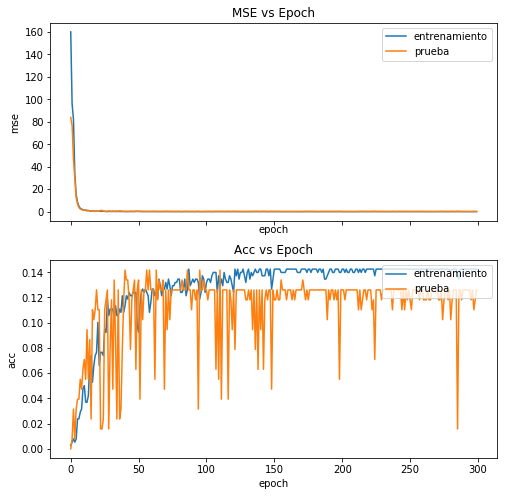

In [216]:
plot_data(history.history['loss'],history.history['val_loss'],history.history['acc'],history.history['val_acc'])

Con una arquitectura de 6 capas,5 ocultas con activación *sigmoid* de 200 neuronas cada una y salida *linear*, optimizador sgd con learning rate de 0.01, al igual que en la redes anteriores, antes de probar se observa que el mse es diferente al de la red ff de 3 capas que se trabaja en la parte b), la diferencia se nota en la convergencia, en la red ff esta es monotona en cambio en la red profunda esta es decreciente pero inestable. Dado esta situación se probo con un lr más bajo y decay pero no lograron cambiar esta situación, lo ultimo que se probo fue agregarle momentum al sgd, lo que logro hacerlo más parecido al caso de la red ff.

**G)**

In [224]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error',metrics=['accuracy'])
model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 732889.4214 - acc: 0.0000e+00 - val_loss: 357430.2042 - val_acc: 0.0000e+00
Epoch 2/300
379/379 [==============================] - 0s 110us/step - loss: 1369028.4479 - acc: 0.0000e+00 - val_loss: 2657048.0827 - val_acc: 0.0000e+00
Epoch 3/300
379/379 [==============================] - 0s 133us/step - loss: 1313037.4058 - acc: 0.0000e+00 - val_loss: 371433.2904 - val_acc: 0.0000e+00
Epoch 4/300
379/379 [==============================] - 0s 111us/step - loss: 135525.8859 - acc: 0.0000e+00 - val_loss: 30575.5111 - val_acc: 0.0000e+00
Epoch 5/300
379/379 [==============================] - 0s 110us/step - loss: 87754.1448 - acc: 0.0026 - val_loss: 90087.0074 - val_acc: 0.0079
Epoch 6/300
379/379 [==============================] - 0s 116us/step - loss: 49135.4442 - acc: 0.0000e+00 - val_loss: 26817.1073 - val_acc: 0.0000e+00
Epoch 7/300
379/379 [===========================

379/379 [==============================] - 0s 94us/step - loss: 17.0500 - acc: 0.0079 - val_loss: 2175.1287 - val_acc: 0.0000e+00
Epoch 114/300
379/379 [==============================] - 0s 87us/step - loss: 15.0510 - acc: 0.0053 - val_loss: 2157.4111 - val_acc: 0.0000e+00
Epoch 115/300
379/379 [==============================] - 0s 107us/step - loss: 10.4516 - acc: 0.0237 - val_loss: 2130.5286 - val_acc: 0.0000e+00
Epoch 116/300
379/379 [==============================] - 0s 102us/step - loss: 7.0041 - acc: 0.0343 - val_loss: 2135.6633 - val_acc: 0.0079
Epoch 117/300
379/379 [==============================] - 0s 126us/step - loss: 8.6707 - acc: 0.0185 - val_loss: 2145.5723 - val_acc: 0.0000e+00
Epoch 118/300
379/379 [==============================] - 0s 102us/step - loss: 8.1065 - acc: 0.0237 - val_loss: 2116.8573 - val_acc: 0.0000e+00
Epoch 119/300
379/379 [==============================] - 0s 93us/step - loss: 7.3592 - acc: 0.0317 - val_loss: 2139.6020 - val_acc: 0.0000e+00
Epoch 120/

379/379 [==============================] - 0s 95us/step - loss: 2.7476 - acc: 0.0449 - val_loss: 2130.6427 - val_acc: 0.0000e+00
Epoch 228/300
379/379 [==============================] - 0s 107us/step - loss: 1.6946 - acc: 0.0660 - val_loss: 2129.2222 - val_acc: 0.0079
Epoch 229/300
379/379 [==============================] - 0s 97us/step - loss: 3.8513 - acc: 0.0237 - val_loss: 2138.6518 - val_acc: 0.0079
Epoch 230/300
379/379 [==============================] - 0s 108us/step - loss: 2.3951 - acc: 0.0422 - val_loss: 2136.5408 - val_acc: 0.0000e+00
Epoch 231/300
379/379 [==============================] - 0s 86us/step - loss: 3.0486 - acc: 0.0449 - val_loss: 2135.7075 - val_acc: 0.0000e+00
Epoch 232/300
379/379 [==============================] - 0s 86us/step - loss: 2.8243 - acc: 0.0211 - val_loss: 2124.5639 - val_acc: 0.0000e+00
Epoch 233/300
379/379 [==============================] - 0s 90us/step - loss: 2.8432 - acc: 0.0501 - val_loss: 2126.0774 - val_acc: 0.0000e+00
Epoch 234/300
379/3

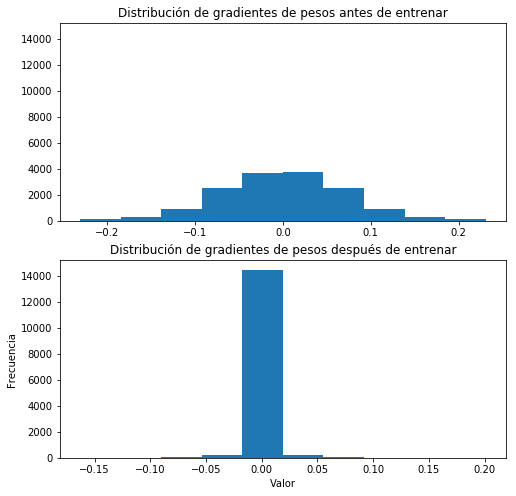

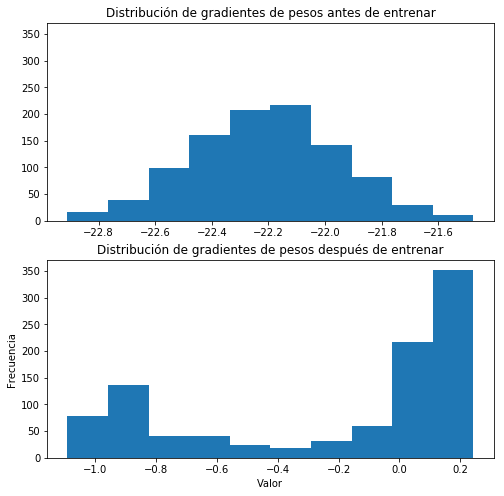

In [226]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())

plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())



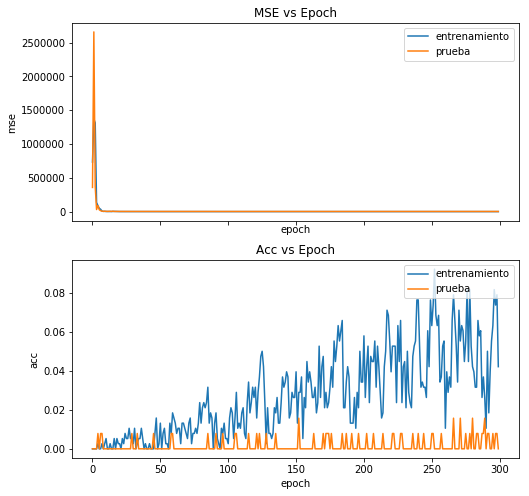

In [225]:
plot_data(history.history['loss'],history.history['val_loss'],history.history['acc'],history.history['val_acc'])